<a href="https://colab.research.google.com/github/Fabafroz/Machine_learning/blob/main/Disney_Movies_Analyzation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Evaluation Metrics:
Mean Absolute Error (MAE): 9713317.480832115
Mean Squared Error (MSE): 94348536483438.73
Root Mean Squared Error (RMSE): 9713317.480832115


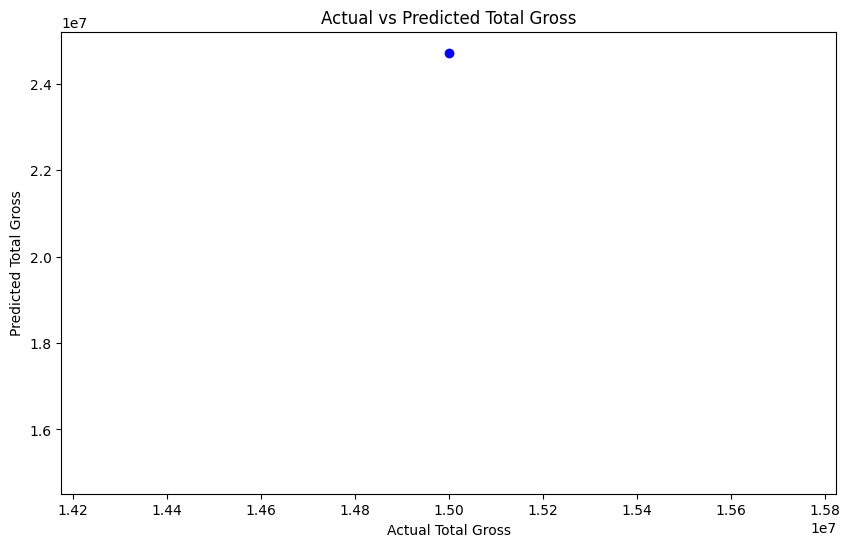

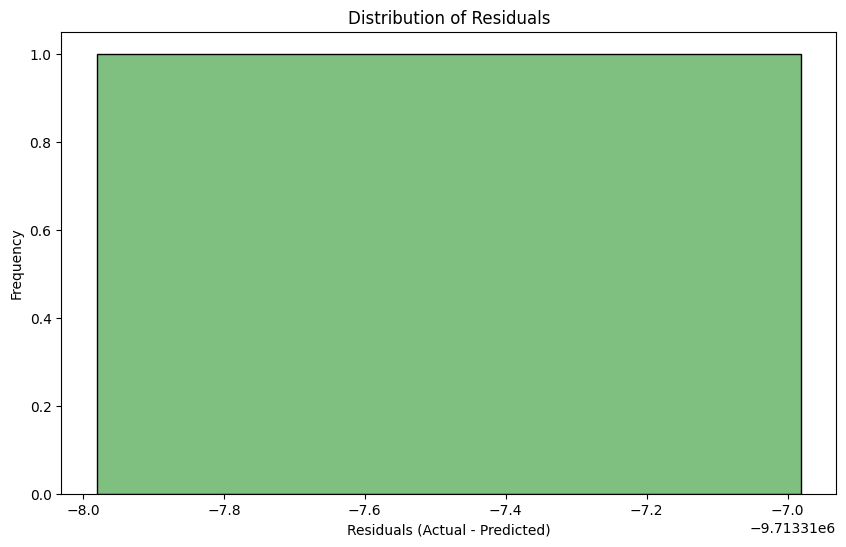

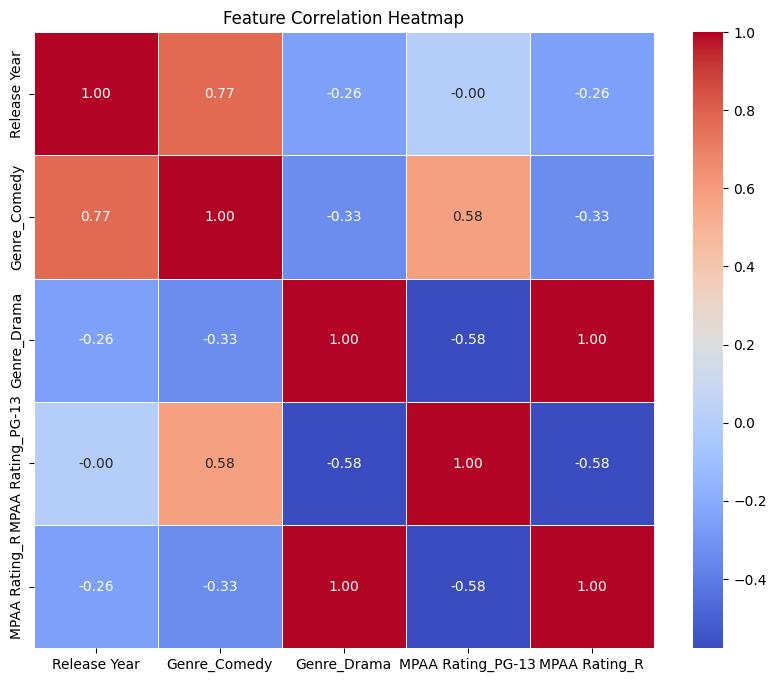

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load your data
# data = pd.read_csv('your_data.csv')

# Example data structure (replace with your actual data loading)
data = {
    'Movie Title': ['Movie A', 'Movie B', 'Movie C', 'Movie D'],
    'Genre': ['Action', 'Drama', 'Action', 'Comedy'],
    'MPAA Rating': ['PG-13', 'R', 'PG', 'PG-13'],
    'Date Released': ['01-01-2020', '02-02-2021', '03-03-2022', '04-04-2023'],
    'Total Gross': ['20000000', '15000000', '25000000', '18000000']
}

data = pd.DataFrame(data)

# Ensure 'Total Gross' is numeric and handle errors gracefully
data['Total Gross'] = pd.to_numeric(data['Total Gross'], errors='coerce')

# Drop rows with NaN values in the target column ('Total Gross')
data = data.dropna(subset=['Total Gross'])

# Convert 'Date Released' to datetime
data['Date Released'] = pd.to_datetime(data['Date Released'], format='%d-%m-%Y')

# Convert 'Date Released' to the number of years since the first release
data['Release Year'] = (data['Date Released'] - data['Date Released'].min()).dt.days / 365  # Convert to years

# Drop the original 'Date Released' column as it is now represented as 'Release Year'
data = data.drop(columns=['Date Released'])

# One-hot encode categorical columns like 'Genre' and 'MPAA Rating'
categorical_columns = ['Genre', 'MPAA Rating']
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Features (X) and target (y)
X = data.drop('Total Gross', axis=1)
y = data['Total Gross']

# Convert all features to numeric values
X = X.apply(pd.to_numeric, errors='coerce')

# Ensure no non-numeric columns are left in X
X = X.dropna(axis=1, how='any')  # Drop any columns that still have non-numeric values

# Check for rows with any NaN values (if any exist in features)
X = X.dropna()

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print evaluation metrics
print("\nEvaluation Metrics:")
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Visualization of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)  # Perfect prediction line
plt.title('Actual vs Predicted Total Gross')
plt.xlabel('Actual Total Gross')
plt.ylabel('Predicted Total Gross')
plt.show()

# Visualizing residuals (errors)
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='green')
plt.title('Distribution of Residuals')
plt.xlabel('Residuals (Actual - Predicted)')
plt.ylabel('Frequency')
plt.show()

# Visualizing the correlation heatmap of features
plt.figure(figsize=(10, 8))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()
